<a href="https://colab.research.google.com/github/malborroni/RECMojion/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerie

In [2]:
! sudo pip install git+https://github.com/rcmalli/keras-vggface.git

# Example of face detection with a vggface2 model
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd

import seaborn as sns
from matplotlib import style
style.use('seaborn-pastel')

import keras
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.models import Model, Sequential, load_model
from keras.utils import to_categorical
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
import keras_vggface
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input, decode_predictions
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint 
from sklearn.metrics import accuracy_score

import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold

import random
import pickle

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-yy8xegf9
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-yy8xegf9
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=1ee8af4873b568435bbd3ae0c00c03b3bba9158ab32b0162ee37b1bbad95c126
  Stored in directory: /tmp/pip-ephem-wheel-cache-yevn0l9u/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


# Funzioni

In [0]:
def graph(history):
  # funzione che prende in input il modello fittato e fa un plot della loss in validation e train
  epochs=len(history.history['loss'])
  x_plot = list(range(1,epochs+1))
  plt.figure()
  
  plt.subplot(1, 2, 1)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

  
  plt.subplot(1, 2, 2)
  plt.xlabel('Epochs')
  plt.ylabel('Acc')
  plt.plot(x_plot, history.history['acc'])
  plt.plot(x_plot, history.history['val_acc'])
  plt.legend(['Training', 'Validation'])
  
  plt.tight_layout()
  plt.show()


#Dataset

Il dataset si trova in un file chiamato XY.pkl nel drive 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import del dataset:

    - X : immagini (senza preprocessing)
    - Y : labels ("fear","happy",ect)

In [0]:
with open('/content/drive/My Drive/AML/XY.pkl', 'rb') as infile:
    result = pickle.load(infile)
X,Y=result

In [6]:
X.shape, Y.shape

((2590, 224, 224, 3), (2590,))

In [0]:
X = np.array(X).astype('float64')
Y = np.array(Y)

In [0]:
le = LabelEncoder()
Y = le.fit_transform(Y) # Encoding dei labels

## Feature Extration

In [9]:
base_model = VGGFace(include_top = False, input_shape = (224, 224, 3), model='senet50')

In [0]:
X = preprocess_input(X,version=2)

In [11]:
base_model.summary()

Model: "vggface_senet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________

In [0]:
layer_cut = "activation_66"
model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_cut).output)

In [0]:
X = model.predict(X)

# Modello

In [0]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
# define 5-fold cross validation 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

In [0]:
batch_size = 128
num_epoch = 100
filepath = "/content/drive/My Drive/AML/kfold_nn.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1,restore_best_weights=True) 

Train on 1655 samples, validate on 414 samples
Epoch 1/100
1655/1655 [==============================] - 3s 2ms/step - loss: 1.8212 - acc: 0.3069 - val_loss: 1.4004 - val_acc: 0.6232

Epoch 00001: val_acc did not improve from 0.92530
Epoch 2/100
1655/1655 [==============================] - 1s 496us/step - loss: 1.0217 - acc: 0.6592 - val_loss: 0.6700 - val_acc: 0.8140

Epoch 00002: val_acc did not improve from 0.92530
Epoch 3/100
1655/1655 [==============================] - 1s 495us/step - loss: 0.5902 - acc: 0.8121 - val_loss: 0.4845 - val_acc: 0.8285

Epoch 00003: val_acc did not improve from 0.92530
Epoch 4/100
1655/1655 [==============================] - 1s 500us/step - loss: 0.4182 - acc: 0.8689 - val_loss: 0.3889 - val_acc: 0.8792

Epoch 00004: val_acc did not improve from 0.92530
Epoch 5/100
1655/1655 [==============================] - 1s 491us/step - loss: 0.2943 - acc: 0.9112 - val_loss: 0.3641 - val_acc: 0.8816

Epoch 00005: val_acc did not improve from 0.92530
Epoch 6/100
165

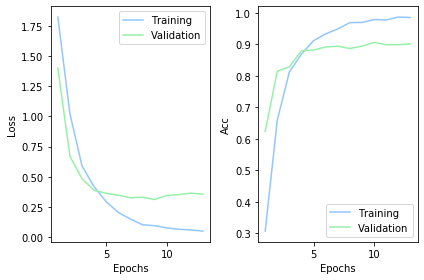

acc: 90.21%
Train on 1656 samples, validate on 414 samples
Epoch 1/100
1656/1656 [==============================] - 3s 2ms/step - loss: 1.7909 - acc: 0.3110 - val_loss: 1.3042 - val_acc: 0.6957

Epoch 00001: val_acc did not improve from 0.92530
Epoch 2/100
1656/1656 [==============================] - 1s 492us/step - loss: 0.9294 - acc: 0.6902 - val_loss: 0.5964 - val_acc: 0.7947

Epoch 00002: val_acc did not improve from 0.92530
Epoch 3/100
1656/1656 [==============================] - 1s 500us/step - loss: 0.5235 - acc: 0.8303 - val_loss: 0.4511 - val_acc: 0.8575

Epoch 00003: val_acc did not improve from 0.92530
Epoch 4/100
1656/1656 [==============================] - 1s 494us/step - loss: 0.3678 - acc: 0.8804 - val_loss: 0.4385 - val_acc: 0.8551

Epoch 00004: val_acc did not improve from 0.92530
Epoch 5/100
1656/1656 [==============================] - 1s 495us/step - loss: 0.2746 - acc: 0.9052 - val_loss: 0.3720 - val_acc: 0.8696

Epoch 00005: val_acc did not improve from 0.92530
Epo

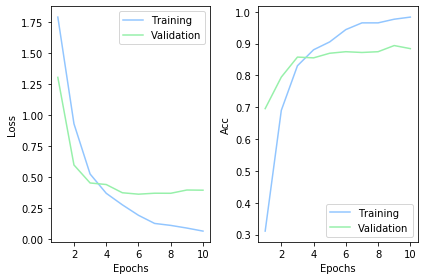

acc: 91.92%
Train on 1657 samples, validate on 415 samples
Epoch 1/100
1657/1657 [==============================] - 3s 2ms/step - loss: 1.9697 - acc: 0.2559 - val_loss: 1.7340 - val_acc: 0.5928

Epoch 00001: val_acc did not improve from 0.92530
Epoch 2/100
1657/1657 [==============================] - 1s 496us/step - loss: 1.4169 - acc: 0.5444 - val_loss: 0.9647 - val_acc: 0.7157

Epoch 00002: val_acc did not improve from 0.92530
Epoch 3/100
1657/1657 [==============================] - 1s 494us/step - loss: 0.7394 - acc: 0.7628 - val_loss: 0.5300 - val_acc: 0.8458

Epoch 00003: val_acc did not improve from 0.92530
Epoch 4/100
1657/1657 [==============================] - 1s 505us/step - loss: 0.5042 - acc: 0.8334 - val_loss: 0.4318 - val_acc: 0.8843

Epoch 00004: val_acc did not improve from 0.92530
Epoch 5/100
1657/1657 [==============================] - 1s 498us/step - loss: 0.3470 - acc: 0.8877 - val_loss: 0.3885 - val_acc: 0.8795

Epoch 00005: val_acc did not improve from 0.92530
Epo

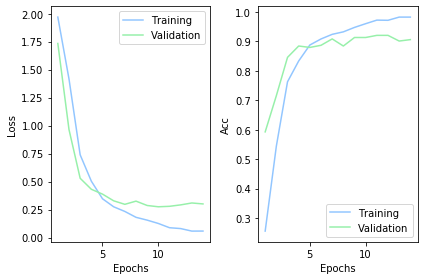

acc: 88.80%
Train on 1659 samples, validate on 415 samples
Epoch 1/100
1659/1659 [==============================] - 3s 2ms/step - loss: 1.8815 - acc: 0.2773 - val_loss: 1.5880 - val_acc: 0.4313

Epoch 00001: val_acc did not improve from 0.92530
Epoch 2/100
1659/1659 [==============================] - 1s 493us/step - loss: 1.2137 - acc: 0.5702 - val_loss: 0.8119 - val_acc: 0.7422

Epoch 00002: val_acc did not improve from 0.92530
Epoch 3/100
1659/1659 [==============================] - 1s 499us/step - loss: 0.6803 - acc: 0.7697 - val_loss: 0.5962 - val_acc: 0.8048

Epoch 00003: val_acc did not improve from 0.92530
Epoch 4/100
1659/1659 [==============================] - 1s 496us/step - loss: 0.4318 - acc: 0.8583 - val_loss: 0.4651 - val_acc: 0.8337

Epoch 00004: val_acc did not improve from 0.92530
Epoch 5/100
1659/1659 [==============================] - 1s 493us/step - loss: 0.3464 - acc: 0.8891 - val_loss: 0.4375 - val_acc: 0.8554

Epoch 00005: val_acc did not improve from 0.92530
Epo

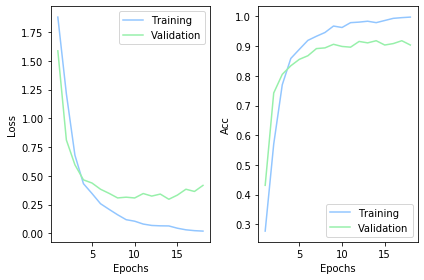

acc: 93.02%
Train on 1660 samples, validate on 415 samples
Epoch 1/100
1660/1660 [==============================] - 3s 2ms/step - loss: 1.8471 - acc: 0.3102 - val_loss: 1.4908 - val_acc: 0.6048

Epoch 00001: val_acc did not improve from 0.92530
Epoch 2/100
1660/1660 [==============================] - 1s 503us/step - loss: 1.1151 - acc: 0.6247 - val_loss: 0.6509 - val_acc: 0.7976

Epoch 00002: val_acc did not improve from 0.92530
Epoch 3/100
1660/1660 [==============================] - 1s 499us/step - loss: 0.6575 - acc: 0.7783 - val_loss: 0.4433 - val_acc: 0.8723

Epoch 00003: val_acc did not improve from 0.92530
Epoch 4/100
1660/1660 [==============================] - 1s 497us/step - loss: 0.4137 - acc: 0.8669 - val_loss: 0.3996 - val_acc: 0.8482

Epoch 00004: val_acc did not improve from 0.92530
Epoch 5/100
1660/1660 [==============================] - 1s 495us/step - loss: 0.3125 - acc: 0.9024 - val_loss: 0.3124 - val_acc: 0.8819

Epoch 00005: val_acc did not improve from 0.92530
Epo

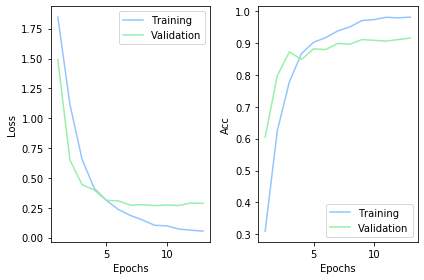

acc: 90.49%
91.53% (+/- 1.47%)


In [26]:
for train, test in kfold.split(X, Y):
  #create data
    x_train = X[train]
    x_test = X[test]
    y_train = to_categorical(Y[train], num_classes = 7)
    y_test = to_categorical(Y[test], num_classes = 7)

# Create model
    model = Sequential()
    # C1
    model.add(Conv2D(32, kernel_size=1, activation='relu', input_shape= (14, 14, 1024)))
    model.add(Conv2D(128, kernel_size=3, activation='relu'))
    model.add(Conv2D(32, kernel_size=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    # D
    model.add(Dense(210, activation='relu')) # 21-28-56 buono 224 best
    model.add(Dropout(0.5)) # 0.5
    model.add(Dense(7, activation='softmax'))
# Compile model
    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])	
# Fit the model
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .2, random_state = 42, stratify = y_train)

    model_log = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks=[early_stop,checkpoint])
    graph(model_log)
# Evaluate the model
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


Salvataggio accuracy

In [0]:
import json
kfold_acc = {}
kfold_acc["CNN"]=(np.mean(cvscores), np.std(cvscores))
json = json.dumps(kfold_acc)

f = open("/content/drive/My Drive/AML/kfold_acc.json","w")
f.write(json)
f.close()

# Fully

In [0]:
batch_size = 128
num_epoch = 200
#filepath = "/content/drive/My Drive/AML/fully.h5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1,restore_best_weights=True) 

Train on 1655 samples, validate on 414 samples
Epoch 1/200
1655/1655 [==============================] - 4s 2ms/step - loss: 1.9424 - acc: 0.1831 - val_loss: 1.8523 - val_acc: 0.3816
Epoch 2/200
1655/1655 [==============================] - 1s 801us/step - loss: 1.8043 - acc: 0.2773 - val_loss: 1.5109 - val_acc: 0.5773
Epoch 3/200
1655/1655 [==============================] - 1s 800us/step - loss: 1.4560 - acc: 0.4725 - val_loss: 1.0874 - val_acc: 0.6763
Epoch 4/200
1655/1655 [==============================] - 1s 800us/step - loss: 1.0840 - acc: 0.6260 - val_loss: 0.7152 - val_acc: 0.8140
Epoch 5/200
1655/1655 [==============================] - 1s 799us/step - loss: 0.7863 - acc: 0.7347 - val_loss: 0.5577 - val_acc: 0.8333
Epoch 6/200
1655/1655 [==============================] - 1s 797us/step - loss: 0.6302 - acc: 0.7879 - val_loss: 0.4108 - val_acc: 0.8744
Epoch 7/200
1655/1655 [==============================] - 1s 800us/step - loss: 0.4571 - acc: 0.8562 - val_loss: 0.3757 - val_acc: 0.8

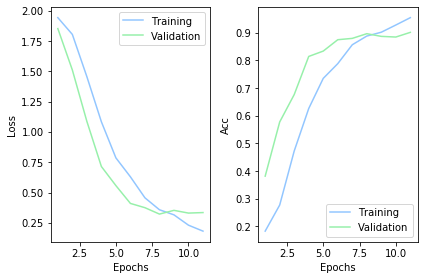

acc: 88.87%
Train on 1656 samples, validate on 414 samples
Epoch 1/200
1656/1656 [==============================] - 4s 2ms/step - loss: 1.9182 - acc: 0.1787 - val_loss: 1.8056 - val_acc: 0.3092
Epoch 2/200
1656/1656 [==============================] - 1s 798us/step - loss: 1.7118 - acc: 0.3273 - val_loss: 1.4252 - val_acc: 0.5483
Epoch 3/200
1656/1656 [==============================] - 1s 790us/step - loss: 1.3386 - acc: 0.5048 - val_loss: 0.9400 - val_acc: 0.7391
Epoch 4/200
1656/1656 [==============================] - 1s 791us/step - loss: 0.9822 - acc: 0.6558 - val_loss: 0.6170 - val_acc: 0.8333
Epoch 5/200
1656/1656 [==============================] - 1s 791us/step - loss: 0.6866 - acc: 0.7591 - val_loss: 0.5338 - val_acc: 0.8092
Epoch 6/200
1656/1656 [==============================] - 1s 795us/step - loss: 0.5425 - acc: 0.8176 - val_loss: 0.3915 - val_acc: 0.8889
Epoch 7/200
1656/1656 [==============================] - 1s 792us/step - loss: 0.3858 - acc: 0.8786 - val_loss: 0.3779 - 

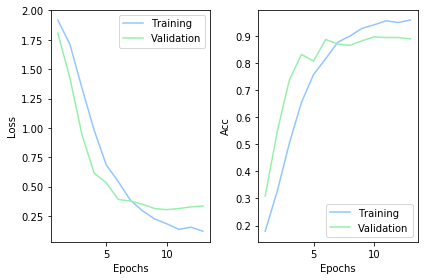

acc: 91.73%
Train on 1657 samples, validate on 415 samples
Epoch 1/200


ResourceExhaustedError: ignored

In [19]:
X = X/300
from keras.utils import to_categorical
for train, test in kfold.split(X, Y):
  #create data
    x_train = X[train]
    x_test = X[test]
    y_train = to_categorical(Y[train], num_classes = 7)
    y_test = to_categorical(Y[test], num_classes = 7)

# Create model
    model = Sequential()
    model.add(Flatten())
    # D
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.33))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.33))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.33))
    model.add(Dense(7, activation='softmax'))
# Compile model
    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])	
# Fit the model
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .2, random_state = 42, stratify = y_train)

    model_log = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks=[early_stop])#,checkpoint])
    graph(model_log)
# Evaluate the model
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))